In [5]:
def acuracia_modelo(model_instance, x_train, y_train, x_test, y_test):
    model_instance.fit(x_train, y_train)
    y_pred = model_instance.predict(x_test)
    return accuracy_score(y_test, y_pred)

def onInterval(vMin, vMax, value):
    if value >= vMin and value <= vMax:
        return 0
    return 1
def setOutlier(df, colName, col):
    iqr = df[colName].quantile(.75) - df[colName].quantile(.25)
    inf_limit = df[colName].median() - (iqr*1.5)
    sup_limit = df[colName].median() + (iqr*1.5)
    df[col] = df[colName].apply(lambda x: onInterval(inf_limit, sup_limit, x))
    return df

In [2]:
import warnings ; warnings.filterwarnings("ignore", category=RuntimeWarning) 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [6]:
df = pd.read_csv('../data/train_hidrometros.csv')
df.pipe(setOutlier, 'vidaHidrometro', 'OUTvidaHidrometro')
df.drop(df[df['OUTvidaHidrometro']==1].index, inplace=True)
print('-')

-


In [7]:
previsor = df.drop(columns='status').values
classe = df['status'].values

In [8]:
scaler = StandardScaler()
previsor = scaler.fit_transform(previsor)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(previsor,classe,random_state = 0)

In [10]:
randomForest = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)

In [11]:
acuracia_modelo(model_instance = randomForest,\
                x_train = X_train, \
                y_train = y_train, \
                x_test = X_test, \
                y_test = y_test)

0.7635814889336016

In [12]:
feat = df.drop(columns='status').keys()
feat_labels = feat.get_values()
pd.DataFrame(randomForest.feature_importances_, feat_labels, columns=['importance'])

,importance
CVProcessado,0.200018
QtdOcorrencias,0.044533
QtdMedicoes,0.068030
QTD_INSTALACOES,0.031990
IMO_QTD_PONTOS_UTILIZACAO,0.116212
vidaInstalacao,0.181368
vidaHidrometro,0.172973
outCV,0.000000
MAR_SEQ_MARCA_3.0,0.007461
MAR_SEQ_MARCA_10.0,0.021648


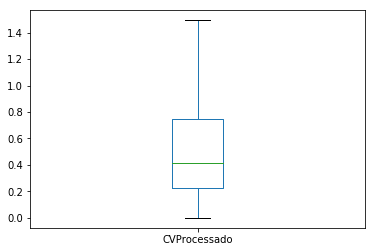

In [15]:
df.CVProcessado.plot.box()

In [16]:
df['CVProcessado'].describe()

count    3976.000000
mean        0.523129
std         0.373138
min         0.000000
25%         0.222646
50%         0.411458
75%         0.749427
max         1.493329
Name: CVProcessado, dtype: float64